In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from scipy.stats import norm, skew
%matplotlib inline

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [2]:
cd "/Users/chiragbhattad/Downloads/Analyze_This_2018"

/Users/chiragbhattad/Downloads/Analyze_This_2018


In [3]:
data = pd.read_csv('Training_dataset_Original.csv')
# data.head(10)

In [4]:
print(sum(list(data['default_ind'])))

19697


In [5]:
data.drop(['application_key'],axis=1, inplace=True)
# data.head()

In [6]:
# quantiles_list = [0, 0.25, 0.5, 0.75, 1]
# quantiles = data['mvar14'].quantile(quantiles_list)
# plt.hist(data['mvar14'], bins=50)
# for quantile in quantiles:
#     plt.axvline(quantile, c='r')
# plt.show()

In [7]:
# data['mvar14'] = np.log((1+data['mvar14']))

In [8]:
# data['mvar14'] = data['mvar14']>5.0
# data['mvar14'] = data['mvar14']<20.0

## Delete useless features

In [9]:
# cols = data.columns

# for i in cols:
#     count = data[i].isnull().sum()
#     if count>20000:
#         data.drop([i], axis=1, inplace=True)
# #     print (count)

In [10]:
new_cols = data.columns
print(len(new_cols))

48


## Replace NaN values with median

In [11]:
data.fillna(value=data.median(axis=0), inplace=True)
print()

In [12]:
data.corr()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,default_ind
mvar1,1.000000,-0.256224,-0.497789,-0.267180,-0.239676,0.399901,0.266474,0.557929,0.495168,0.414815,-0.182999,0.158849,0.223325,0.000025,0.181045,-0.204200,-0.204885,-0.202800,-0.132800,-0.120175,-0.530731,-0.384967,-0.313070,-0.132767,0.356824,0.401792,0.393735,0.660464,0.373299,0.091241,0.074459,0.432739,0.274166,-0.241621,-0.275538,-0.247504,0.354730,-0.169846,-0.221394,-0.142478,-0.116909,-0.698481,0.432683,0.008976,-0.128967,-0.252594,-0.404865
mvar2,-0.256224,1.000000,0.120972,0.089591,0.039859,-0.145104,-0.091945,-0.177353,-0.147461,-0.119838,0.053257,-0.020493,-0.061538,-0.003896,-0.062963,0.131279,0.140039,0.140076,0.176730,0.171926,0.196692,0.172477,0.165490,0.032139,-0.216607,-0.184211,-0.186190,-0.152629,-0.153542,-0.088066,-0.025938,-0.151759,-0.126813,0.068516,0.098702,0.157460,-0.133834,0.292163,0.054500,0.048748,0.080145,0.130698,0.021429,-0.089621,0.002842,0.087440,0.228661
mvar3,-0.497789,0.120972,1.000000,0.369375,0.658141,-0.127995,-0.085671,-0.193187,-0.191957,-0.145581,0.309079,-0.145556,-0.097108,-0.001201,-0.089337,0.021163,0.022951,0.022211,-0.057295,-0.062458,0.156883,0.111287,0.090184,0.155147,-0.084758,-0.083563,-0.080120,-0.311696,-0.069196,-0.005887,0.003419,-0.111922,-0.103181,0.096305,0.139943,0.370368,-0.059843,0.115334,0.111829,0.119495,0.028185,0.433876,-0.243478,-0.012192,0.117407,0.336369,0.194331
mvar4,-0.267180,0.089591,0.369375,1.000000,0.092213,-0.073698,-0.046230,-0.107875,-0.111055,-0.074035,0.079133,-0.076768,-0.055164,-0.001147,-0.052341,0.014615,0.011649,0.010996,-0.031016,-0.034603,0.096689,0.063556,0.048515,0.033257,-0.070114,-0.077120,-0.074050,-0.168538,-0.058533,-0.037572,-0.000853,-0.101510,-0.072950,0.098656,0.056339,0.144380,-0.083194,0.065211,0.111786,0.056148,-0.006371,0.211323,-0.129453,0.003141,0.057840,0.894530,0.140994
mvar5,-0.239676,0.039859,0.658141,0.092213,1.000000,-0.050649,-0.046862,-0.074270,-0.082461,-0.072075,0.220126,-0.064107,-0.041852,-0.002439,-0.050925,-0.007161,-0.009799,-0.010808,-0.049138,-0.052844,0.055456,0.042204,0.033595,0.014089,-0.059819,-0.065348,-0.061653,-0.119783,-0.052614,-0.017778,0.019544,-0.087713,-0.064957,0.017808,0.027257,0.238016,-0.071406,0.034754,0.048034,0.097982,0.025131,0.236858,-0.131708,-0.054259,-0.004505,0.086406,0.088262
mvar6,0.399901,-0.145104,-0.127995,-0.073698,-0.050649,1.000000,0.204073,0.508145,0.262408,0.252649,-0.042488,-0.024221,0.178367,-0.000507,0.129650,-0.126837,-0.126653,-0.125418,-0.192199,-0.186791,-0.384247,-0.203483,-0.165400,-0.055592,0.298217,0.235023,0.238068,0.309238,0.225762,0.056194,0.032575,0.162134,0.157500,-0.090964,-0.080174,-0.161491,0.122953,-0.160320,-0.063900,-0.042801,-0.040819,-0.221284,0.022749,0.109521,-0.038043,-0.064866,-0.165279
mvar7,0.266474,-0.091945,-0.085671,-0.046230,-0.046862,0.204073,1.000000,0.352788,0.318502,0.890262,-0.031559,0.132393,0.311282,0.002839,0.179809,-0.042668,-0.043984,-0.041448,-0.050458,-0.038165,-0.175925,-0.118996,-0.094892,-0.024759,0.232697,0.247975,0.249273,0.144767,0.235749,0.075879,0.033331,0.258701,0.181391,-0.006413,-0.052073,-0.040171,0.207731,-0.070082,-0.010221,-0.033467,-0.087158,-0.177534,0.130197,0.031780,0.014031,-0.044518,-0.115823
mvar8,0.557929,-0.177353,-0.193187,-0.107875,-0.074270,0.508145,0.352788,1.000000,0.571441,0.470110,-0.066809,0.210455,0.327796,0.000132,0.216510,-0.138929,-0.140377,-0.137670,-0.184307,-0.172544,-0.508073,-0.309313,-0.254818,-0.081182,0.355848,0.391618,0.406199,0.405040,0.351275,0.078683,0.038846,0.453863,0.207085,-0.116649,-0.109115,-0.141650,0.359472,-0.092813,-0.085849,-0.066272,-0.077451,-0.335091,0.242800,0.049789,-0.058665,-0.095564,-0.222252
mvar9,0.495168,-0.147461,-0.191957,-0.111055,-

## Skewed Feature engineering

In [12]:
numeric_feats = list(data.dtypes[data.dtypes != "object"].index)
numeric_feats.remove('default_ind')

In [ ]:
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

In [14]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)

There are 46 skewed numerical features to Box Cox transform


## Replace values in mvar47

In [15]:
# C=0  L=1

data['mvar47'].replace(to_replace='C', value=0, inplace=True)
data['mvar47'].replace(to_replace='L', value=1, inplace=True)

## Scale the data

In [16]:
feature = data.columns[:-1]
target = data.columns[-1]
X = data[feature]
y = data[target]

In [17]:
sc = StandardScaler()
X = sc.fit_transform(X)

# Principal Component Analysis

In [18]:
pca = PCA(n_components=2, random_state=1)
principal_components = pca.fit_transform(X)

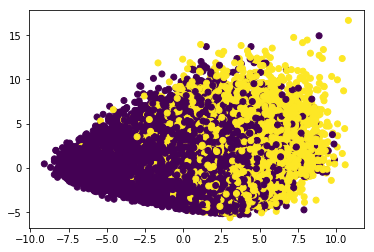

In [405]:
sc = StandardScaler()
X = sc.fit_transform(X)

plt.scatter(principal_components[:,0],principal_components[:,1], c = y)
plt.title("Distribution of training dataset after PCA")


### DBSCAN to get noise points

In [ ]:
# db = DBSCAN(eps=0.5, min_samples=5,n_jobs=2).fit(principal_components)
# labels = db.labels_
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters)

## Removing Noise manually

In [406]:
principal_components = pd.DataFrame(principal_components)
drop_index = principal_components[(principal_components[principal_components.columns[0]] > 10) | (principal_components[principal_components.columns[1]]>25) | (principal_components[principal_components.columns[0]]<-9) | (4*principal_components[principal_components.columns[0]] + 5*principal_components[principal_components.columns[1]]>90 ) ].index
# drop_index = principal_components[(principal_components[principal_components.columns[1]] > 14) | (4*principal_components[principal_components.columns[0]] + principal_components[principal_components.columns[1]]>43)].index
len(drop_index)

21

## Drop those outliers

In [407]:
data.drop(drop_index, axis=0, inplace=True)
feature = data.columns[:-1]
target = data.columns[-1]
X = data[feature]
y = data[target]

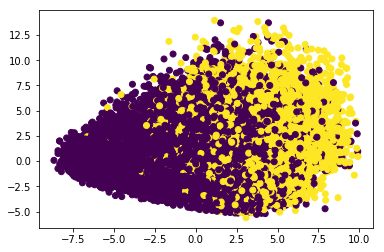

In [408]:
principal_components.drop(drop_index, axis=0, inplace=True)
principal_components = principal_components.as_matrix()
plt.scatter(principal_components[:,0],principal_components[:,1], c = y)

## Leaderboard Dataset

In [409]:
lead_data = pd.read_csv('Leaderboard_dataset.csv')

In [410]:
lead_cols = ['application_key']+ list(data.columns)[:-1]
lead_data = lead_data[lead_cols]

In [411]:
lead_data.fillna(value=lead_data.median(axis=0), inplace=True)
print("")

## Skewness Removal

In [412]:
numeric_feats1 = list(lead_data.dtypes[lead_data.dtypes != "object"].index)
# numeric_feats1.remove('mvar47')
numeric_feats1.remove('application_key')

In [413]:
skewed_feats1 = lead_data[numeric_feats1].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness1 = pd.DataFrame({'Skew' :skewed_feats1})
skewness1


Skew in numerical features: 



,Skew
mvar14,153.271851
mvar11,78.962244
mvar7,53.248164
mvar24,38.179394
mvar10,24.884558
mvar13,17.941039
mvar39,14.499382
mvar5,10.480217
mvar45,9.444150
mvar34,6.349059


In [414]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #data[feat] += 1
    lead_data[feat] = boxcox1p(lead_data[feat], lam)

There are 46 skewed numerical features to Box Cox transform


In [415]:
lead_data['mvar47'].replace(to_replace='C', value=0, inplace=True)
lead_data['mvar47'].replace(to_replace='L', value=1, inplace=True)

## PCA on Leaderboard dataset

In [416]:
sc1 = StandardScaler()
lead_X = sc1.fit_transform(lead_data)

In [417]:
pca1 = PCA(n_components=2, random_state=1)
principal_components1 = pca1.fit_transform(lead_X)

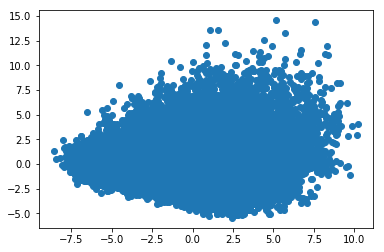

In [418]:
plt.scatter(principal_components1[:,0],principal_components1[:,1])

## Removing Noise datapoints and saving them in rem_points

In [373]:
principal_components1 = pd.DataFrame(principal_components1)
drop_index1 = principal_components1[(principal_components1[principal_components1.columns[0]] > 12) | (principal_components1[principal_components1.columns[1]]>13) | (principal_components1[principal_components1.columns[0]] < -6.5) | (17*principal_components1[principal_components1.columns[0]] + 19*principal_components1[principal_components1.columns[1]]> 275 ) ].index
# drop_index1 = principal_components1[(principal_components1[principal_components1.columns[0]] > 9) | (principal_components1[principal_components1.columns[1]]>10) | (6*principal_components1[principal_components1.columns[0]] - 5*principal_components1[principal_components1.columns[1]]< -55 )].index
len(drop_index1)

59

In [374]:
rem_points = lead_data.iloc[drop_index1]
lead_data.drop(drop_index1, axis=0, inplace=True)
print(lead_data.shape)

(24941, 36)


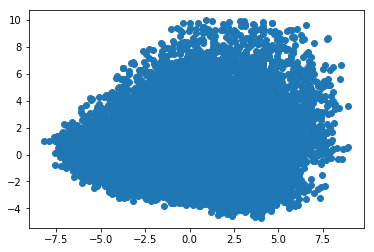

In [375]:
principal_components1.drop(drop_index1, axis=0, inplace=True)
principal_components1 = principal_components1.as_matrix()
plt.scatter(principal_components1[:,0],principal_components1[:,1])

# Scale and train_test_split

In [376]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [377]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Models

In [379]:
random = RandomForestClassifier(n_estimators=200, verbose=1, n_jobs=-1, oob_score=True, random_state=1)
gboost = GradientBoostingClassifier(n_estimators=3000, loss='huber', max_features='sqrt', min_samples_leaf=15, random_state=1)
xgboost = XGBClassifier()

In [380]:
xgboost.fit(X, y)
train_score = xgboost.score(X_train, y_train)
test_score = xgboost.score(X_test, y_test)

print(train_score)
print(test_score)

0.8116203472172608
0.8087518232965201


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Gradient Boost

In [257]:
gboost = GradientBoostingClassifier(n_estimators=3000, verbose=1, loss='exponential', max_features='sqrt', min_samples_leaf=15, random_state=1)
gboost.fit(X, y)

      Iter       Train Loss   Remaining Time 
         1           0.8439            2.62m
         2           0.8276            2.49m
         3           0.8143            2.44m
         4           0.8020            2.46m
         5           0.7892            2.54m
         6           0.7791            2.50m
         7           0.7724            2.73m
         8           0.7644            2.83m
         9           0.7574            2.91m
        10           0.7516            2.88m
        20           0.7098            2.77m
        30           0.6925            2.98m
        40           0.6836            2.76m
        50           0.6784            2.91m
        60           0.6750            2.91m
        70           0.6728            2.81m
        80           0.6710            2.73m
        90           0.6695            2.69m
       100           0.6684            2.61m
       200           0.6595            2.69m
       300           0.6534            2.68m
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=15,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=3000, presort='auto', random_state=1,
              subsample=1.0, verbose=1, warm_start=False)

In [258]:
print(gboost.score(X_train, y_train))
print(gboost.score(X_test, y_test))

0.7973392857142857
0.794625


## K-Means

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=500, precompute_distances=True, verbose=True, random_state=1, n_jobs=-1, algorithm="elkan")
kmeans.fit(X)

In [ ]:
correct = 0
pred = kmeans.predict(X_train)
for i in range(len(X)):
    if pred[0] == y_train[i]
        correct++

print(correct/len(X))

## AdaBoost

In [ ]:
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.5,
                         random_state=1)
adaboost = ada.fit(X,y)
pred = adaboost.predict_proba(X_train)
print(adaboost.score(pred, y_train))

## Grid Search LightGBM

In [234]:
model = lgb.LGBMClassifier(n_jobs=-1, verbose=1, subsample=1.0, min_split_gain=.01)
param_grid = {'n_estimators':[300],
             'num_leaves':[10],
              'colsample_bytree': [0.8],
              'max_depth': [10],
              'reg_lambda': [0.01]}



CV_lgb = GridSearchCV(estimator=model, param_grid=param_grid,scoring='roc_auc', cv= 5, verbose=1)
CV_lgb.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, min_child_samples=10,
        min_child_weight=5, min_split_gain=0.01, n_estimators=10,
        n_jobs=-1, num_leaves=31, objective=None, random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=50000, subsample_freq=1, verbose=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300], 'num_leaves': [10], 'colsample_bytree': [0.8], 'max_depth': [10], 'reg_lambda': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [235]:
print(CV_lgb.score(X_train, y_train))
print(CV_lgb.score(X_test, y_test))

0.8411680195053124
0.8398107700722195


In [236]:
CV_lgb.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 10,
 'n_estimators': 300,
 'num_leaves': 10,
 'reg_lambda': 0.01}

# SVM

In [ ]:
clf = SVC(probability=True, verbose=True, class_weight={0: 75, 1: 25})
clf.fit(X,y)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

# Neural network

In [429]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [440]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 200, init = 'uniform', activation = 'relu', input_dim = 35))
# Adding the third hidden layer
classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu'))
# Adding the fourth hidden layer
classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))
# Adding the fifth hidden layer
classifier.add(Dense(output_dim = 50, init = 'uniform', activation = 'relu'))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 10)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=35, units=10, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys


In [441]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
mlp = MLPClassifier(verbose=True, early_stopping=True, random_state=1)
param_grid = {'hidden_layer_sizes': [()]}

In [442]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 10)

/anaconda/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
55812/55812 [==============================] - 16s - loss: 0.4389 - acc: 0.7861    
Epoch 2/10
55812/55812 [==============================] - 16s - loss: 0.4258 - acc: 0.7976    
Epoch 3/10
55812/55812 [==============================] - 16s - loss: 0.4240 - acc: 0.7982    
Epoch 4/10
55812/55812 [==============================] - 16s - loss: 0.4228 - acc: 0.7999    
Epoch 5/10
55812/55812 [==============================] - 16s - loss: 0.4221 - acc: 0.8001    
Epoch 6/10
55812/55812 [==============================] - 17s - loss: 0.4214 - acc: 0.8012    
Epoch 7/10
55812/55812 [==============================] - 16s - loss: 0.4208 - acc: 0.8004    
Epoch 8/10
55812/55812 [==============================] - 16s - loss: 0.4206 - acc: 0.8009    
Epoch 9/10
55812/55812 [==============================] - 16s - loss: 0.4201 - acc: 0.8016    
Epoch 10/10
55812/55812 [==============================] - 16s - loss: 0.4197 - acc: 0.8010    


In [443]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [444]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16996,  1044],
       [ 3688,  2192]])

In [445]:
X_lead = lead_data[lead_data.columns[1:]]
X_lead = X_lead.as_matrix()
X_lead = sc.fit_transform(X_lead)
# X_lead = pca.transform(X_lead)

In [446]:
predictions = classifier.predict(X_lead)

In [447]:
sub = pd.DataFrame()
sub['app_id'] = lead_data['application_key']
sub['pred'] = predictions
# app_data.head()
sub.sort_values(by=['pred'],ascending=True, inplace=True)
app_data = pd.DataFrame()
app_data['app_id'] = rem_points['application_key']
app_data['pred'] = list(np.zeros(app_data.shape[0], dtype=np.int64))
sub['pred'] = [1 if x >=0.50 else 0 for x in sub['pred']]
frames = [sub, app_data]
sub = pd.concat(frames)
sub = sub.as_matrix().astype(np.int64)

In [448]:
np.savetxt('Etching_coders_IITMadras_243.csv',sub,fmt='%5d', delimiter=",")

## Grid search CV Random forest

In [ ]:
rf = RandomForestClassifier(n_jobs=4, oob_score=False, verbose=1, random_state=1)
param_grid = {'criterion': ["gini", "entropy"],
              'max_features': ["auto", "sqrt", "log2"],
              'n_estimators':[200],
             'min_samples_leaf':[1, 5, 10],
             'min_samples_split':[2,5,10],
             'max_depth':[5,10,15,20]}



CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid,scoring='roc_auc', cv= 3, verbose=1)
CV_rf.fit(X_train, y_train)

In [ ]:
train_score = CV_rf.score(X_train, y_train)
test_score = CV_rf.score(X_test, y_test)

print(train_score)
print(test_score)

In [ ]:
CV_rf.best_params_

In [ ]:
random.fit(X_train, y_train)

train_score = random.score(X_train, y_train)
test_score = random.score(X_test, y_test)
oob_score = random.oob_score_

print(train_score)
print(test_score)
print(oob_score)

## Grid Search CV XGboost

In [312]:
######### This is for 910000 ############
param_grid1 = {'n_estimators': [200],
              'learning_rate': [0.2],
             'gamma': [1.5],
              'reg_lambda': [30]
             }
# drop_index = principal_components[(principal_components[principal_components.columns[0]] > 10) | (principal_components[principal_components.columns[1]]>25) | (principal_components[principal_components.columns[0]]<-9) | (4*principal_components[principal_components.columns[0]] + 5*principal_components[principal_components.columns[1]]>90 ) ].index

In [313]:
xgb = XGBClassifier(n_jobs=-1, silent=False, random_state=1)
# 'learning_rate':[0.01, 0.05, 0.1, 0.2],
param_grid = {'n_estimators': [200],
              'learning_rate': [0.2],
              'gamma': [1.5],
              'reg_lambda': [30]
             }



CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,scoring='roc_auc', cv= 5, verbose=1)
CV_xgb.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200], 'learning_rate': [0.2], 'gamma': [1.5], 'reg_lambda': [30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [314]:
train_score = CV_xgb.score(X_train, y_train)
test_score = CV_xgb.score(X_test, y_test)

print(train_score)
print(test_score)

0.8531912592984565
0.8533719894087276


In [239]:
CV_xgb.best_params_

{'gamma': 1.5, 'learning_rate': 0.2, 'n_estimators': 200, 'reg_lambda': 30}

In [ ]:
new_boost = XGBClassifier(n_estimators=200,learning_rate=0.2, gamma=1.5,silent=False,reg_lambda=30, random_state=1, n_jobs=-1)
new_boost.fit(X, y)

train_score = new_boost.score(X_train, y_train)
test_score = new_boost.score(X_test, y_test)

print(train_score)
print(test_score)

## Using LeaderBoard_dataset as training dataset

In [ ]:
X_lead = lead_data[lead_data.columns[1:]]
X_lead = X_lead.as_matrix()

In [ ]:
X_lead = sc.transform(X_lead)
# X_lead = pca.transform(X_lead)

In [ ]:
# predictions = new_boost.predict_proba(X_lead)
predictions = CV_xgb.predict_proba(X_lead)
predictions.shape

In [ ]:
predictions = predictions[:,1]

In [ ]:
sub = pd.DataFrame()
sub['app_id'] = lead_data['application_key']
sub['pred'] = pd.Series(predictions)

In [ ]:
sub['pred'] = [1 if x >=0.50 else 0 for x in sub['pred']]

In [ ]:
new_lead_data = lead_data.copy()
new_lead_data['default_ind'] = sub['pred']
new_lead_data.head(2)

In [ ]:
new_lead_data.columns = ['application_key'] + list(data.columns)

In [ ]:
new_lead_data.drop(['application_key'], axis=1, inplace=True)


In [ ]:
new_lead_data.index = list(range(80000,105000))
frame = [data, new_lead_data]
new_train_data = pd.concat(frame)
# new_train_data = new_lead_data
print(new_train_data.shape)
new_train_data.tail()

# Training on the new dataset

In [ ]:
feature = new_train_data.columns[:-1]
target = new_train_data.columns[-1]
X = new_train_data[feature]
y = new_train_data[target]
# X = X.as_matrix()
# y = y.as_matrix()

In [ ]:
X.shape

In [ ]:
print(type(X))

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
xgb = XGBClassifier(n_jobs=-1, silent=False, random_state=1)
# 'learning_rate':[0.01, 0.05, 0.1, 0.2],
param_grid = {'n_estimators': [200],
              'learning_rate': [0.2],
              'gamma': [1.5],
              'reg_lambda': [30]
             }



CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,scoring='roc_auc', cv= 3, verbose=1)
CV_xgb.fit(X, y)

In [ ]:
X_lat = data[feature]
y_lat = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lat, y_lat, test_size=0.3, random_state=1)

In [ ]:
X_lat.shape

In [ ]:
y_test.shape

In [ ]:
train_score = CV_xgb.score(X_train, y_train)
test_score = CV_xgb.score(X_test, y_test)

print(train_score)
print(test_score)

# Leaderboard dataset

In [381]:
X_lead = lead_data[lead_data.columns[1:]]
X_lead = X_lead.as_matrix()

In [382]:
X_lead = sc.fit_transform(X_lead)
# X_lead = pca.transform(X_lead)

In [383]:
# predictions = new_boost.predict_proba(X_lead)
predictions = xgboost.predict_proba(X_lead)
predictions.shape

(24941, 2)

## Submission part

In [384]:
predictions = predictions[:,1]

In [385]:
sub = pd.DataFrame()
sub['app_id'] = lead_data['application_key']
sub['pred'] = pd.Series(predictions)

In [386]:
sub.sort_values(by=['pred'],ascending=True, inplace=True)

In [387]:
app_data = pd.DataFrame()
app_data['app_id'] = rem_points['application_key']
app_data['pred'] = list(np.zeros(app_data.shape[0], dtype=np.int64))
# app_data.head()

In [388]:
sub['pred'] = [1 if x >=0.50 else 0 for x in sub['pred']]

In [389]:
frames = [sub, app_data]
sub = pd.concat(frames)
# sub = sub.as_matrix().astype(np.int64)

In [390]:
np.savetxt('Etching_coders_IITMadras_279.csv',sub,fmt='%5d', delimiter=",")

In [ ]:
sub.to_csv('Etching_coders_IITMadras_109.csv',header=False,index=False)

In [ ]:
print(type(sub['pred'].iloc[0]))

### Reordering

In [ ]:
filtered = sub[sub['pred']>=0.95]
print(filtered.shape)
filtered.head()

In [ ]:
drop_indices = list(filtered.index)
sub.drop(drop_indices, axis=0, inplace=True)

In [ ]:
frames = [filtered, sub]
result = pd.concat(frames)

In [ ]:
result['pred'] = [1 if x >=0.50 else 0 for x in result['pred']]

In [ ]:
result.to_csv(path_or_buf='Etching_coders_IITMadras_64.csv',header=False,index=False)

In [ ]:
result.shape

## Outlier detection

In [ ]:
for cols in lead_data.columns:
    iq = lead_data[cols].quantile(q=0.75) - lead_data[cols].quantile(q=0.25)
    up_limit = lead_data[cols].quantile(q=0.75) + 1.5*iq
    lead_data[lead_data[cols]>up_limit] = lead_data[cols].quantile(q=0.5)
    
lead_data.describe()